# Classic Perceptron Algorithm

The perceptron algorithm is the simplest form and foundational algorithm for artificial neural networks. The visual model is a single neuron that can be used for binary classification problems.

And the algorithm learns to make these choices from being exposed to previous data collected with resultant outcomes with one of the two choices. 

Approve if : $ \sum_{i=1}^{d} w_ix_i > \theta $

Deny if : $ \sum_{i=1}^{d}w_ix_i < \theta $

We next introduce an error, we build the following form for our predict function

$ h(x) = \text{sign}\Big((\sum_{i=1}^{d}w_ix_i) + b\Big) $

where $h(x) = 1$ means in malignant and $h(x) = 0 $ benign in our Breast Cancer data set

We next simplify notation by treating the bias $b$ as a weight, and modify $x$ so that

$ w = [b, w_1, \dots, w_d]^{T} $

$ x = [1.0, x_1, \dots, x_d]^{T} $


In [10]:
# Make a prediction with weights

def predict(row, weights):
    activation = weights[0]
    
    for i in range(len(row)-1):
        activation += weights[i + 1] * row[i]
        
    return 1.0 if activation >= 0.0 else 0.0

In [11]:
# Estimate Perceptron weights using stochastic gradient descent
# Code created to fit any sized data set 

def grad_decent(train, alpha, num):
    
    weights = [0.0 for i in range(len(train[0]))] # Initializes weights to 0 for every colomn we have
    
    for i in range(num): # How many times we want to iterate in our decent
        
        for row in train: 
            prediction = predict(row, weights)
            # Error is last item in the row (Y) - the predited (0 or 1)
            error = row[-1] - prediction # Will be with 0(correct) or -1/+1 (incorrect)
            weights[0] = weights[0] + alpha * error
            
            for i in range(len(row)-1):
                weights[i + 1] = weights[i + 1] + alpha * error * row[i]
                
    return weights

In [80]:
# Perceptron Algorithm With Stochastic Gradient Descent

def perceptron(train, test, alpha, num):
    
    predictions = list()
    weights = grad_decent(train, alpha, num)
    
    count = 0
    for row in test:
        prediction = predict(row, weights)
        if prediction == row[-1]:
            count+=1
        predictions.append(prediction)
        
    accuracy = count/len(test) #The correct predictions divided by total
    print("The accuracy of the model is", accuracy)
    print("The model weights are", weights)
    
    answer = input("Would you like to see the predictions (y/n):") #If you would like to visualize the predictions
    if answer == 'y':
        return predictions
    else:
        return 'Done'

In [111]:
# Modeling on large dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer

cancer_dataset = load_breast_cancer()
data = pd.DataFrame(cancer_dataset.data, columns=cancer_dataset.feature_names)
data['Class'] = cancer_dataset.target
print(cancer_dataset.target_names)
# 0 - Malignant, 1 - Benign
data.head()

['malignant' 'benign']


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


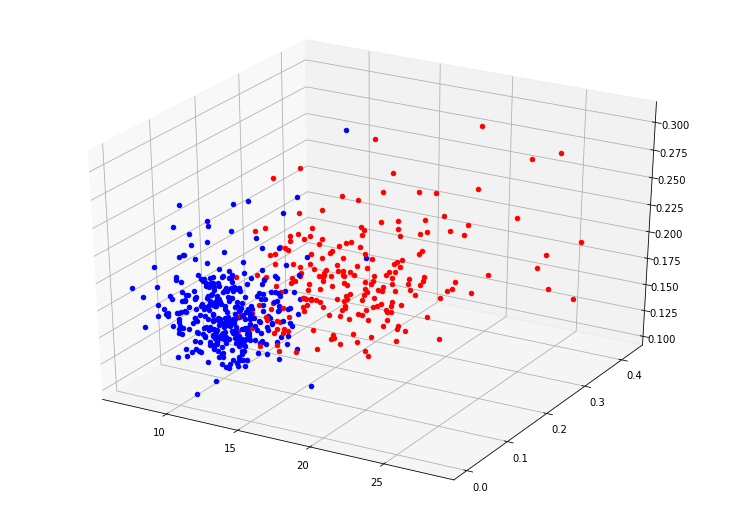

In [113]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

features = np.array(data[['mean radius', 'mean concavity', 'mean symmetry']])

fig = plt.figure()
fig.set_size_inches(10, 7)
ax = Axes3D(fig)

# This means "red" and "blue"
colors = ["r", "b"]
labels = np.array(data['Class'])

# Plot all the features and assign color based on cluster identity label
for i in range(len(features)):
                    ax.scatter(xs=features[i][0], ys=features[i][1], zs=features[i][2],
                               c=colors[labels[i]], zdir='z')

In [114]:
# Selecting the features we are using, for visualizaton purposes, 3 are chosen
data_features = data[['mean radius', 'mean concavity', 'mean symmetry','Class']]
# Converts dataframe into an array
data_used = data_features.values

# Spliting into train and test
train = data_used[0:427] # 75% of the data
test = data_used[427:570] # Remaining 25%

In [115]:
# Running the above created model
alpha = .07
num = 8000

perceptron(train, test, alpha, num)

The accuracy of the model is 0.9507042253521126
The model weights are [84.41999999999825, -4.254180000010903, -75.87764072016164, -66.9846239999763]
Would you like to see the predictions (y/n):n


'Done'